# Demonstrating the Framework with a Small Example

In this Jupyter notebook, we illustrate the functionality of the framework. We provide a simple example where we generate instances of the GISP problem, along with a training set and a test set. The GP function is trained on the training set and evaluated on the test set.


## Generating Training and Test Instances

In this notebook, we focus on training and testing for the GISP problem. The corresponding data is stored in the directories `"data/gisp/train_for_jupyter"` and `"data/gisp/test_for_jupyter"`. To reduce computation time, the training set is limited to 10 instances, with the number of nodes in the problem (which determines the complexity) ranging between 40 and 50.

The instances are generated as follows:


In [ ]:
import os
import shutil
import conf
from data.build_gisp_instances import *

# Note: The construction of the instance reuses the code by Labassi et al. on Graph Neural Networks.
# Parameters for instance generation
n = 50  # Number of training instances
whichSet = 'SET2'  # Set identifier, must be set to 'SET2'
setparam = 100  # Parameter related to "revenues"
alphaE2 = 0.5  # Probability of building an edge

# Graph parameters for GISP problem representation
min_n = 60  # Minimum number of nodes in the graph
max_n = 70  # Maximum number of nodes in the graph
er_prob = 0.6  # Erdos-Rényi random graph parameter

training_file = "data\\gisp\\train_for_jupyter"

# Directory for training instances
lp_dir_training = os.path.join(conf.ROOT_DIR, training_file)
if os.path.exists(lp_dir_training):
    print(f"Cleaning directory: {lp_dir_training}")
    try:
        shutil.rmtree(lp_dir_training)  # Recursively removes a directory and all its contents
    except Exception as e:
        print(f"Error cleaning {lp_dir_training}: {e}")
else:
    os.mkdir(lp_dir_training)

# Generate training instances
generate_instances(n, whichSet, setparam, alphaE2, min_n, max_n, er_prob, None, lp_dir_training, False)

test_file = "data\\gisp\\test_for_jupyter"

# Parameters for test instance generation
n = 60  # Number of test instances, increased by 10 in case they are failures in the evaluation through all the baselines

# Directory for test instances
lp_dir_test = os.path.join(conf.ROOT_DIR, test_file)
if os.path.exists(lp_dir_test):
    print(f"Cleaning directory: {lp_dir_test}")
    try:
        shutil.rmtree(lp_dir_test)  # Recursively removes a directory and all its contents
    except Exception as e:
        print(f"Error cleaning {lp_dir_test}: {e}")
else:
    os.mkdir(lp_dir_test)

# Generate test instances
generate_instances(n, whichSet, setparam, alphaE2, min_n, max_n, er_prob, None, lp_dir_test, False)


## Training the GP

With this dataset, the GP2S algorithm can now be trained. By default, if the problem is one of the three artificial problems, the algorithm will search for data in `data/problem/training_folder`. The initial population is set to 30, with 10 generations, which can still be time-consuming. However, smaller values can be used if the goal is simply to run the algorithm quickly.


In [1]:
from genetic_programming_for_node_scoring import *
import os
import conf

# Parameters for GP_function training
problem = "gisp"  # Problem type
training_folder = "train_for_jupyter"
initial_pop = 50  # Population size for tree-based heuristics
mate = 0.9  # Crossover rate
mutate = 0.1  # Mutation rate
nb_of_gen = 50  # Number of generations
seed = 0  # Random seed
node_select = "BFS"  # Node selection method (BFS allows testing DFS as well)
saving_folder = os.path.join(conf.ROOT_DIR, "outcomes_jupyter\\GP_function")

# Construct a unique name for the run
name = f"{problem}_pop_{initial_pop}_nb_gen{nb_of_gen}_seed_{seed}"

# Ensure the saving directory exists
if not os.path.exists(saving_folder):
    os.makedirs(saving_folder)

# Tournament parameters
fitness_size = 5  # Number of individuals in the fitness tournament
parsimony_size = 1.2  # Parameter for size-based tournament
time_limit = 0  # Time limit (not applicable for artificial problems)
nb_of_instances = 0  # Number of instances (not applicable for artificial problems)

# Run the GP_function training
main_GP(
    problem=problem,
    initial_pop=initial_pop,
    mate=mate,
    mutate=mutate,
    nb_of_gen=nb_of_gen,
    seed=seed,
    node_select=node_select,
    saving_folder=saving_folder,
    name=name,
    training_folder=training_folder,
    fitness_size=fitness_size,
    parsimony_size=parsimony_size,
    time_limit=time_limit,
    nb_of_instances=nb_of_instances
)


seed: 0
protectedDiv(10000000, getCutEfficacy)
mean solving time or gap:  3.53

mul(getNNonz, getCutEfficacy)
mean solving time or gap:  3.16

add(getCutEfficacy, sub(getNConss, mul(getNConss, getCutLPSolCutoffDistance)))
mean solving time or gap:  2.88

protectedDiv(10000000, 10000000)
mean solving time or gap:  2.38

add(getRowNumIntCols, getDepth)
mean solving time or gap:  3.16

mul(getCutLPSolCutoffDistance, add(getNNonz, getNVars))
mean solving time or gap:  2.94

add(getCutLPSolCutoffDistance, protectedDiv(10000000, getNConss))
mean solving time or gap:  2.82

sub(mul(getRowNumIntCols, getNNonz), getNNonz)
mean solving time or gap:  3.14

add(getCutEfficacy, getNConss)
mean solving time or gap:  3.22

sub(add(protectedDiv(mul(getNNonz, protectedDiv(getCutEfficacy, getRowObjParallelism)), getCutLPSolCutoffDistance), getNConss), getCutLPSolCutoffDistance)
mean solving time or gap:  3.01

sub(getCutEfficacy, getNNonz)
mean solving time or gap:  3.0

sub(getDepth, getNVars)
mean sol

KeyboardInterrupt: 

For example, with an initial population of 30 and 10 generations, GP2S converged to the following function: `protectedDiv(10000000, sub(getNConss, getNConss))`.

## Convergence Plot

The performance of the GP method across generations can be visualized. It is important to note that, since the training set is small and the problems are simple, the convergence plot may not necessarily show the desired form (e.g., a decrease in average solution time over generations).


c:\Users\mathd\OneDrive\Bureau\Stage\Code\GP_for_cut_selection\outcomes_jupyter\GP_function\gisp_pop_30_nb_gen10_seed_0.json


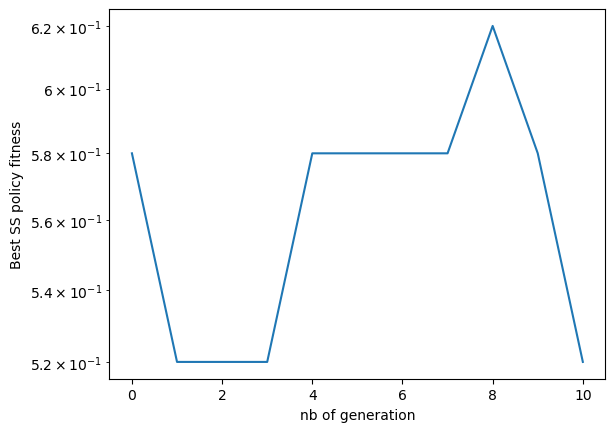

the best GP function is  protectedDiv(10000000, getRowNumIntCols)


In [6]:
from artificial_pbs.evaluation_convergence_of_GP_over_gens_articial_pbs import *

# Define the folder containing simulation results (defaults to the first element in this folder)
simulation_folder = os.path.join(conf.ROOT_DIR, "outcomes_jupyter")

# Evaluate the convergence of GP across generations
gp_function = convergence_of_gp_over_generations(simulation_folder,saving=False)


## Evaluation of the Method on the Test Set

In this section, we compare the GP-produced method to the following:
- The standalone SCIP method
- The handcrafted methods used in the paper:
    - BE BFS
    - BE DFS
    - LB BFS

We do not compare the GNN method, as it also requires training. Readers are encouraged to visit the repository [https://github.com/ds4dm/learn2comparenodes](https://github.com/ds4dm/learn2comparenodes) for further details.


In [4]:
from artificial_pbs.evaluation_artificial_problems import *
gp_func_dic = {"1.2":gp_function}#1.2 is meant for the parsimony parameter
print(gp_function)
problem = "gisp"
partition= "test_for_jupyter"
evaluation_gnn_gp(problem, partition, gp_func_dic,do_gnn=False, build_set_of_instances=False,saving_folder="outcomes_jupyter")

protectedDiv(10000000, getRowNumIntCols)
here we go again
result for test_for_jupyter GP_function and SCIP :  perfs are done for the function  GP_parsimony_parameter_1.2
perfs are done for the function  SCIP
perfs are done for the function  best_estimate_BFS
perfs are done for the function  best_estimate_DFS
It is ok for GP_function and the SCIP baseline

one is done, with total of  1
result for test_for_jupyter GP_function and SCIP :  perfs are done for the function  GP_parsimony_parameter_1.2
perfs are done for the function  SCIP
perfs are done for the function  best_estimate_BFS
perfs are done for the function  best_estimate_DFS
It is ok for GP_function and the SCIP baseline

one is done, with total of  2
result for test_for_jupyter GP_function and SCIP :  perfs are done for the function  GP_parsimony_parameter_1.2
perfs are done for the function  SCIP
perfs are done for the function  best_estimate_BFS
perfs are done for the function  best_estimate_DFS
It is ok for GP_function and t

## Output of the Results

To display the results, we choose to print them directly. To display the table format for LaTeX with the appropriate colors, you need to use `build_table_with_cell_colors(dic_info)` .


In [5]:
from artificial_pbs.build_tables_artificial_pb_perfs import *

# Gather information from JSON files for the specified problems and partitions
dic_info = gather_info_from_json_files(problems=["gisp"], partitions=["test_for_jupyter"], saving_folder="outcomes_jupyter")

# Display the output results
just_get_the_output_results(dic_info)


geometric mean solving time for set test_for_jupyter for method best_estimate_BFS is $1.16\pm 2.1$ on 50 instances
geometric mean solving time for set test_for_jupyter for method best_estimate_DFS is $1.14\pm 2.1$ on 50 instances
geometric mean solving time for set test_for_jupyter for method GP_parsimony_parameter_1.2 is $0.73\pm 2.5$ on 50 instances
geometric mean solving time for set test_for_jupyter for method SCIP is $0.65\pm 2.7$ on 50 instances
RESULTS FOR gisp - test_for_jupyter
results for function BE BFS are 1.2 +-2.1
results for function BE DFS are 1.1 +-2.1
results for function GP2S are 0.7 +-2.5
results for function SCIP are 0.6 +-2.7

